# Имена, которые давали детям в США за период с 1880 по текущий год

Управление социального обеспечения США выложило в сеть данные о частоте встречаемости детских имен за период с 1880 года по настоящее время, которые доступны по ссылке https://www.ssa.gov/oact/babynames/limits.html. Более подробно об этом наборе данных можно прочитать в книге: Уэс Маккинли. Python и анализ данных / Пер с англ. Слинкин А. А. -- М.: ДМК Пресс, 2015 - 482 с. ил., ISBN 978-5-97060-315-4.

In [1]:
from pathlib import Path
import re
import tempfile
from urllib.parse import urlparse, urljoin
import zipfile

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (16, 9)

## Загрузка данных

Запросить данные со страницы, где находится ссылка на архив с данными.

In [3]:
root_url = 'https://www.ssa.gov/oact/babynames/limits.html'

r = requests.get(root_url)

Найти все ссылки на странице для скачивания архива.

In [4]:
download_url = None

soup = BeautifulSoup(r.text)
for link in soup.find_all('a'):
    if link.text == "National data" and link.has_attr('href'):
        download_url = link['href']

assert download_url is not None

In [5]:
if not urlparse(download_url).netloc:
    download_url = urljoin(root_url, download_url)

Скачать архив с данными.

In [6]:
names_path = Path(tempfile.gettempdir()) / 'names'

if not names_path.exists():
    Path.mkdir(names_path, parents=True)

In [7]:
zip_path = names_path / 'names.zip'

if not zip_path.exists():
    r = requests.get(download_url)
    with open(zip_path, 'wb') as fout:
        fout.write(r.content)

Распаковать архив с данными.

In [8]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(names_path)

Проверить данные, загрузив один из файлов.

In [9]:
names1880 = pd.read_csv(
    names_path / 'yob1880.txt', 
    names=['name', 'sex', 'births']
)

Отобразить информацию о фрейме.

In [10]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [11]:
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


Описание атрибутов набора:
- **name** - имя, данное при рождении ребенка;
- **sex** - пол родившегося ребенка;
- **births** - количество родившихся детей, с данным именем.

Отобразить кругову диаграмму для количества родившихся мальчиков и девочек в 1880 г.

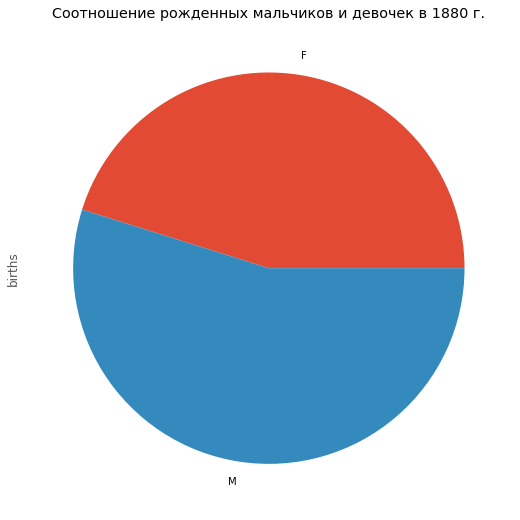

In [12]:
names1880.groupby('sex')['births'].sum().plot(
    kind='pie',
    title='Соотношение рожденных мальчиков и девочек в 1880 г.'
);

Отобразить список из 10 наиболее популярных имен в 2015 г.

In [13]:
selected = names1880.sort_values('births', ascending=False).head(10)

selected

,name,sex,births
942,John,M,9655
943,William,M,9532
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348
946,George,M,5126
947,Frank,M,3242
948,Joseph,M,2632
1,Anna,F,2604
949,Thomas,M,2534


Отобразить список из 10 наиболее популярных имен в 1880 г.

In [14]:
selected = names1880.sort_values('births', ascending=False).head(10)

selected

,name,sex,births
942,John,M,9655
943,William,M,9532
0,Mary,F,7065
944,James,M,5927
945,Charles,M,5348
946,George,M,5126
947,Frank,M,3242
948,Joseph,M,2632
1,Anna,F,2604
949,Thomas,M,2534


Отобразить столбчатую диаграмму, показывающую число родившихся для 10 наиболее популярных имен.

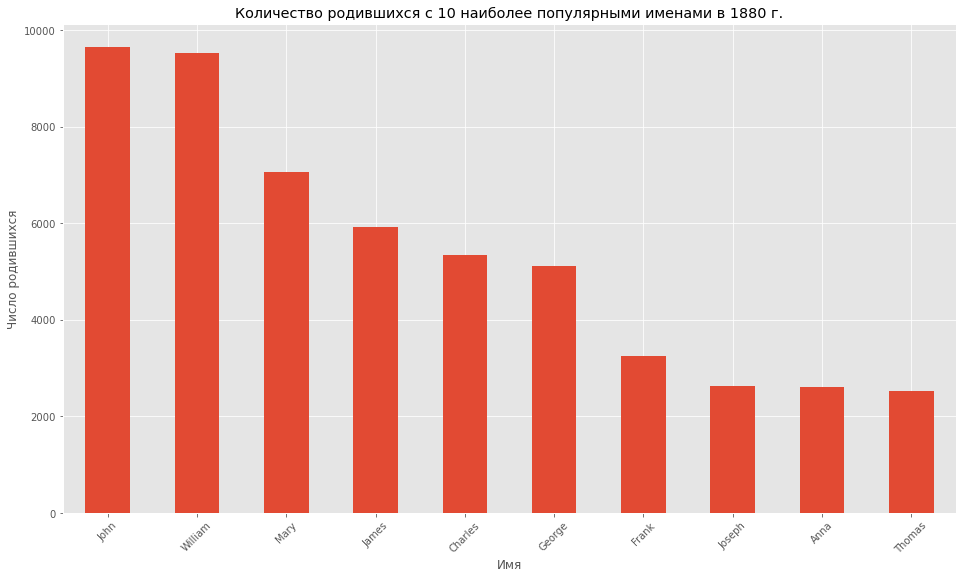

In [15]:
ax = selected.plot(
    kind='bar',
    title="Количество родившихся с 10 наиболее популярными именами в 1880 г.",
    legend=False
)
ax.set_xlabel("Имя")
ax.set_xticklabels(selected.name, rotation=45)
ax.set_ylabel("Число родившихся")

plt.show();

Как видно, количество родившихся с именем John, находящимся первым в списке, практически в 4 раза превышает количество родившихся с именем Thomas, находящимся последним в списке.

### Задание 1

Загрузить данные за 2015 год и за предыдущий год. Отобразить круговые диаграммы, показывающие соотношение числа родившихся маличиков и девочек, а также произвести анализ списка 10 наиболее популярных имен в эти годы. Сравнить результаты с данными 1880 года и сделать выводы.

Загрузить данные за 2015 г.

In [16]:
names2015 = pd.read_csv(
    names_path / 'yob2015.txt', 
    names=['name', 'sex', 'births']
)

Отобразить информацию о фрейме.

In [17]:
names2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33138 entries, 0 to 33137
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    33138 non-null  object
 1   sex     33138 non-null  object
 2   births  33138 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 776.8+ KB


In [18]:
names2015.head(10)

,name,sex,births
0,Emma,F,20463
1,Olivia,F,19705
2,Sophia,F,17430
3,Ava,F,16383
4,Isabella,F,15633
5,Mia,F,14913
6,Abigail,F,12413
7,Emily,F,11792
8,Charlotte,F,11403
9,Harper,F,10300


Отобразить кругову диаграмму для количества родившихся мальчиков и девочек в 2015 г.

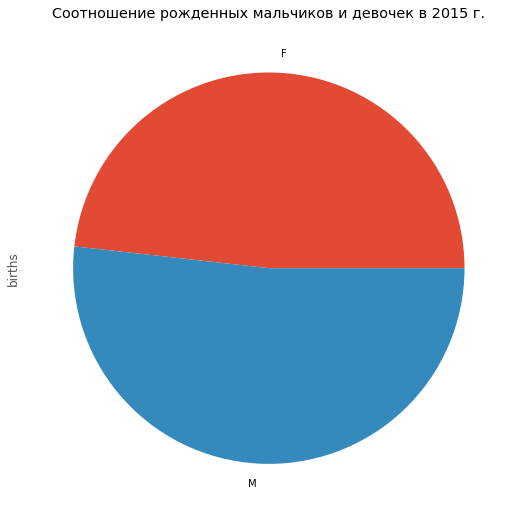

In [19]:
names2015.groupby('sex')['births'].sum().plot(
    kind='pie',
    title='Соотношение рожденных мальчиков и девочек в 2015 г.'
);

Отобразить список из 10 наиболее популярных имен в 2015 г.

In [20]:
selected = names2015.sort_values('births', ascending=False).head(10)

selected

,name,sex,births
0,Emma,F,20463
1,Olivia,F,19705
19099,Noah,M,19646
19100,Liam,M,18385
2,Sophia,F,17430
19101,Mason,M,16638
3,Ava,F,16383
19102,Jacob,M,15962
19103,William,M,15920
4,Isabella,F,15633


Отобразить столбчатую диаграмму, показывающую число родившихся для 10 наиболее популярных имен.

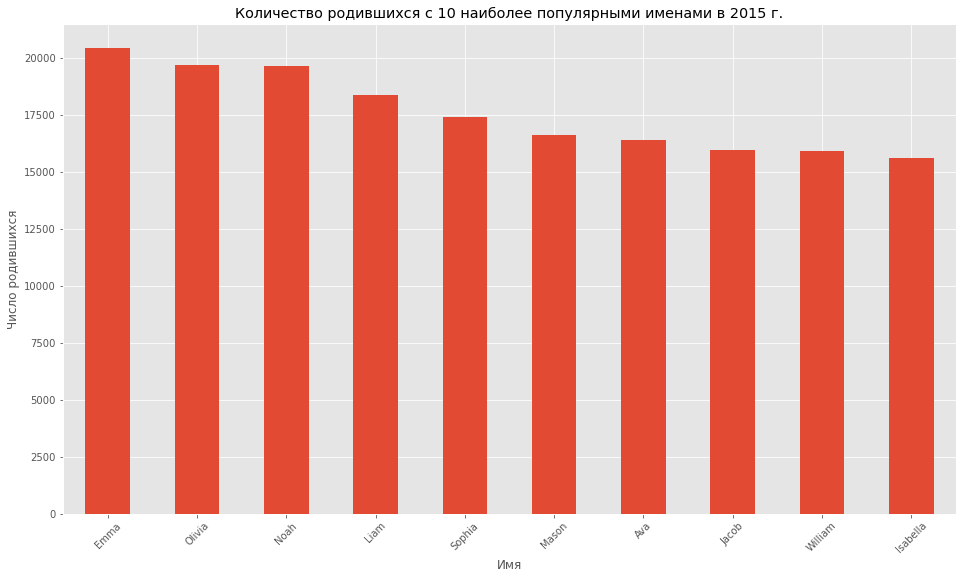

In [21]:
ax = selected.plot(
    kind='bar',
    title="Количество родившихся с 10 наиболее популярными именами в 2015 г.",
    legend=False
)
ax.set_xlabel("Имя")
ax.set_xticklabels(selected.name, rotation=45)
ax.set_ylabel("Число родившихся")

plt.show();

Загрузить данные за 2019 г.

In [22]:
names2019 = pd.read_csv(
    names_path / 'yob2019.txt', 
    names=['name', 'sex', 'births']
)

Отобразить информацию о фрейме.

In [23]:
names2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31954 entries, 0 to 31953
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    31954 non-null  object
 1   sex     31954 non-null  object
 2   births  31954 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 749.0+ KB


In [24]:
names2019.head(10)

,name,sex,births
0,Olivia,F,18451
1,Emma,F,17102
2,Ava,F,14440
3,Sophia,F,13714
4,Isabella,F,13306
5,Charlotte,F,13138
6,Amelia,F,12862
7,Mia,F,12414
8,Harper,F,10442
9,Evelyn,F,10392


Отобразить кругову диаграмму для количества родившихся мальчиков и девочек в 2019 г.

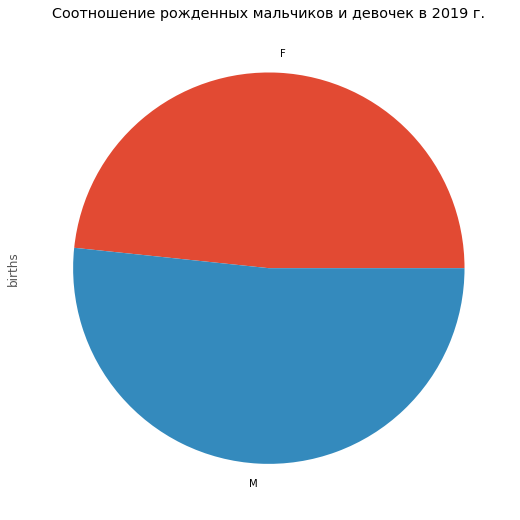

In [25]:
names2019.groupby('sex')['births'].sum().plot(
    kind='pie',
    title='Соотношение рожденных мальчиков и девочек в 2019 г.'
);

Отобразить список из 10 наиболее популярных имен в 2019 г.

In [26]:
selected = names2019.sort_values('births', ascending=False).head(10)

selected

,name,sex,births
17905,Liam,M,20502
17906,Noah,M,19048
0,Olivia,F,18451
1,Emma,F,17102
2,Ava,F,14440
17907,Oliver,M,13891
3,Sophia,F,13714
17908,William,M,13542
4,Isabella,F,13306
17909,Elijah,M,13300


Отобразить столбчатую диаграмму, показывающую число родившихся для 10 наиболее популярных имен.

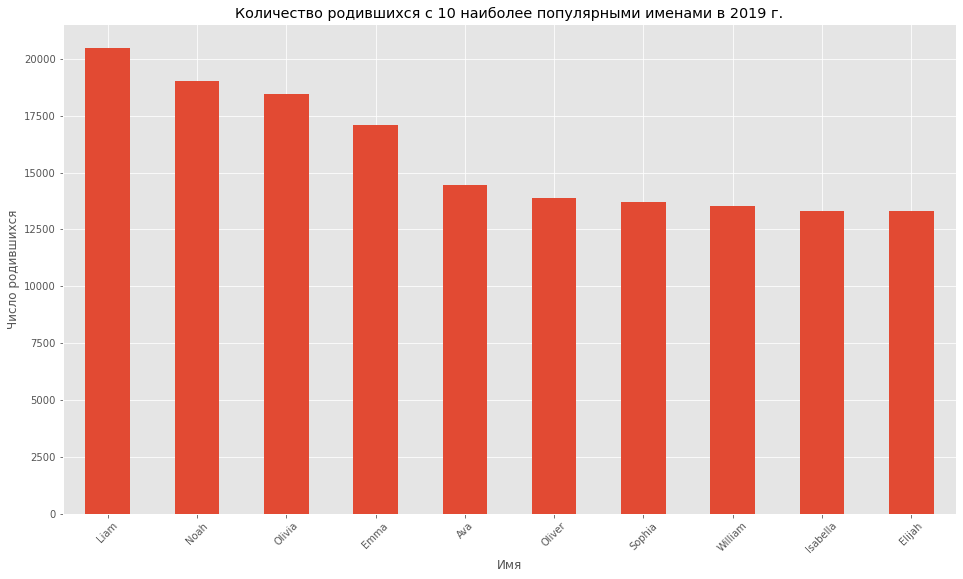

In [27]:
ax = selected.plot(
    kind='bar',
    title="Количество родившихся с 10 наиболее популярными именами в 2019 г.",
    legend=False
)
ax.set_xlabel("Имя")
ax.set_xticklabels(selected.name, rotation=45)
ax.set_ylabel("Число родившихся")

plt.show();

Таким образом из числа популярных с позапрошлого века в список наиболее популярных имен попало только имя William. По сранению с позапрошлым веком все более увеличивается разнообразие имен у детей. Важно также отметить, что для этих лет мальчиков рождается немного больше, чем девочек.

Построить круговую диаграмму для 10 наиболее популярных имен в 1880 году.

## Загрузка полного набора данных

Загрузить все файлы из набора.

In [28]:
frames = []
columns = ['name', 'sex', 'births']

regexp = re.compile(r'yob(\d+).txt')

for path in names_path.iterdir():
    match = regexp.match(path.name)
    if match:
        frame = pd.read_csv(path, names=columns)

        frame['year'] = int(match.group(1))
        frames.append(frame)

names_data = pd.concat(frames, ignore_index=True)

Отобразить информацию о загруженном датасете.

In [29]:
names_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989401 entries, 0 to 1989400
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 60.7+ MB


In [30]:
names_data.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Описание атрибутов набора:

- **name** - имя, данное при рождении ребенка;
- **sex** - пол родившегося ребенка;
- **births** - количество родившихся детей, с данным именем;
- **year** - год рождения ребенка.

Проверить, имеются ли в таблице пропуски.

In [31]:
np.any(names_data.isnull())

False

В исходном датасете пропусков нет.

## Общее количество родившихся по полу и году

Сформировать сводную таблицу с данными по году и полу.

In [32]:
total_births = pd.pivot_table(
    names_data, 
    values='births', 
    index='year', 
    columns='sex', 
    aggfunc=np.sum
)

Получить информацию о сводной таблице.

In [33]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F       140 non-null    int64
 1   M       140 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [34]:
total_births.head(10)

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110784
1887,145982,101412
1888,178622,120851


Отобразить динамику количества рожденных мальчиков и девочек.

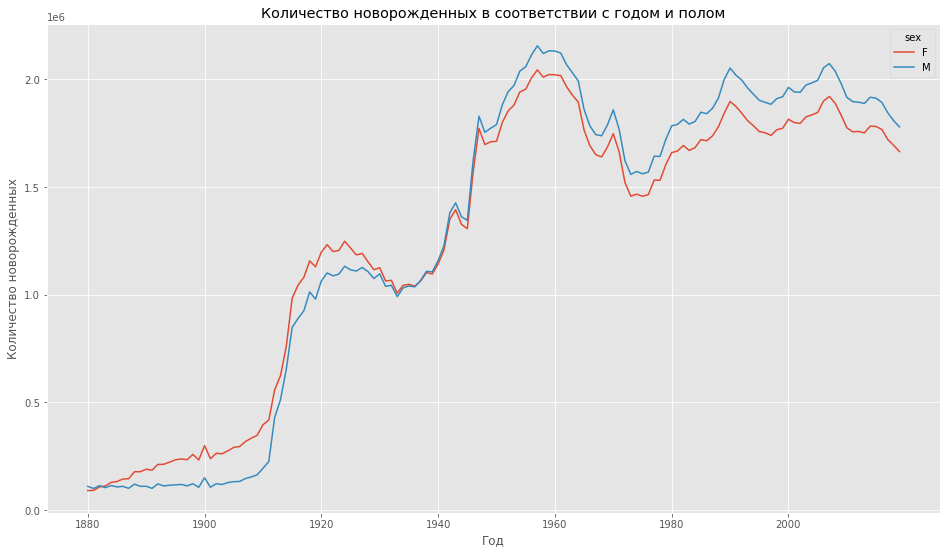

In [35]:
years = np.unique(total_births.index)

total_births.plot(
    title="Количество новорожденных в соответствии с годом и полом", 
    xticks=range(years.min(), years.max() + 1, 20), 
    xlabel="Год",
    ylabel="Количество новорожденных"
);

### Задание 2

Определить долю новорожденных мальчиков и девочек для каждого года. Построить динамику изменения доли новорожденных мальчиков и девочек. Найти годы, в которых доля новорожденных мальчиков отличалась по модулю не более чем на 0.002 от доли новорожденных девочек.

Найдем доли родившихся мальчиков и девочек:

In [36]:
total_births['boys_prop'] = total_births.M / (total_births.M + total_births.F)
total_births['girls_prop'] = total_births.F / (total_births.M + total_births.F)

total_births.head(10)

sex,F,M,boys_prop,girls_prop
year,,,,
1880,90994,110490,0.548381,0.451619
1881,91953,100743,0.522808,0.477192
1882,107847,113686,0.513179,0.486821
1883,112319,104625,0.482267,0.517733
1884,129019,114442,0.470063,0.529937
1885,133055,107799,0.447570,0.552430
1886,144533,110784,0.433908,0.566092
1887,145982,101412,0.409921,0.590079
1888,178622,120851,0.403546,0.596454


Проверка полученных данных.

In [37]:
assert np.allclose(total_births.boys_prop + total_births.girls_prop, 1)

Отобразить динамику изменения доли маличиков и девочек.

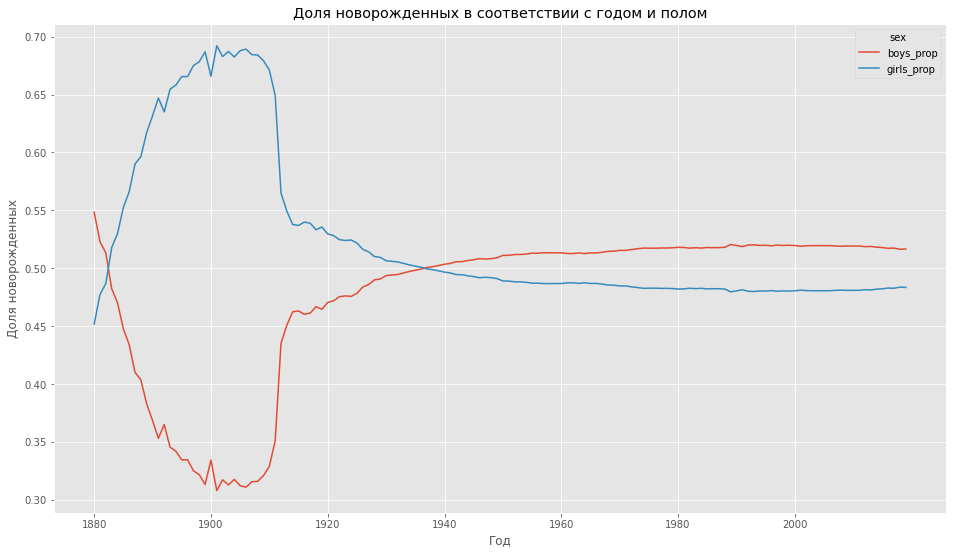

In [38]:
total_births[['boys_prop', 'girls_prop']].plot(
    title="Доля новорожденных в соответствии с годом и полом", 
    xticks=range(years.min(), years.max() + 1, 20), 
    xlabel="Год",
    ylabel="Доля новорожденных"
);

Найдем годы, для которых доля мальчиков была примерно равна доле девочек.

In [39]:
total_births['diff_prop'] = (total_births.boys_prop - total_births.girls_prop).abs()

total_births.head(10)

sex,F,M,boys_prop,girls_prop,diff_prop
year,,,,,
1880,90994,110490,0.548381,0.451619,0.096762
1881,91953,100743,0.522808,0.477192,0.045616
1882,107847,113686,0.513179,0.486821,0.026357
1883,112319,104625,0.482267,0.517733,0.035465
1884,129019,114442,0.470063,0.529937,0.059874
1885,133055,107799,0.447570,0.552430,0.104860
1886,144533,110784,0.433908,0.566092,0.132185
1887,145982,101412,0.409921,0.590079,0.180158
1888,178622,120851,0.403546,0.596454,0.192909


In [40]:
total_births[total_births.diff_prop < 0.002]

sex,F,M,boys_prop,girls_prop,diff_prop
year,,,,,
1936,1040353,1037153,0.499230,0.500770,0.001540
1937,1063974,1066567,0.500609,0.499391,0.001217


### Задание 3

Определить 10 наиболее популярных имен младенцев за всю историю наблюдений. Построить круговую диаграмму для числа новорожденных, названных этими именами.

Сгруппировать данные по имени, подсчитав общее число новорожденных с конкретным именем:

In [41]:
births_by_name = names_data.groupby('name')['births'].sum()

births_by_name.head(10)

name
Aaban        120
Aabha         40
Aabid         16
Aabidah        5
Aabir         10
Aabriella     44
Aada          13
Aadam        293
Aadan        130
Aadarsh      224
Name: births, dtype: int64

Получить список из 10 наиболее популярных имен за весь период наблюдения.

In [42]:
most_popular_names = births_by_name.sort_values(ascending=False)[:10]

most_popular_names

name
James      5201182
John       5155617
Robert     4845266
Michael    4395357
William    4147152
Mary       4143217
David      3643465
Joseph     2633323
Richard    2576936
Charles    2411726
Name: births, dtype: int64

Отобразить круговую диаграмму количества новорожденных с 10 наиболее популярными именами.

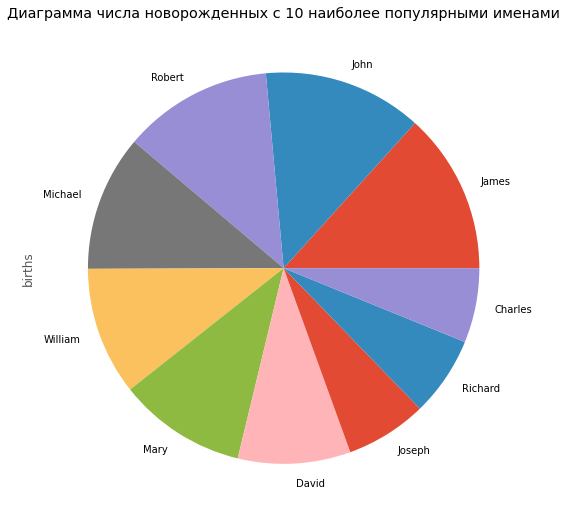

In [43]:
most_popular_names.plot(
    kind='pie',
    title="Диаграмма числа новорожденных с 10 наиболее популярными именами"
);

### Задание 4

Определить имена мальчиков и девочек, являющиеся самыми популярными в каждом году. Построить столбчатые диаграммы, отображающие число лет, для которых данное имя было самым популярным отдельно для мальчиков и для девочек.

Определить наиболее популярные имена в году среди мальчиков.

In [44]:
boys = names_data[names_data.sex == 'M']

Получить наиболее популярное имя для малчиков для каждого года.

In [45]:
def get_most_popular_name(group):
    return group[group.births == group.births.max()]['name'].values[0]

boys_by_year = boys.groupby('year').apply(get_most_popular_name)

boys_by_year.tail(10)

year
2010    Jacob
2011    Jacob
2012    Jacob
2013     Noah
2014     Noah
2015     Noah
2016     Noah
2017     Liam
2018     Liam
2019     Liam
dtype: object

Получить наиболее популярные имена для мальчиков за весь период наблюдения.

In [46]:
popular_names_for_boys = boys_by_year.value_counts()

popular_names_for_boys

John       44
Michael    44
Robert     17
Jacob      14
James      13
Noah        4
Liam        3
David       1
dtype: int64

Построить столбчатую диаграмму для наиболее популярных имен среди мальчиков.

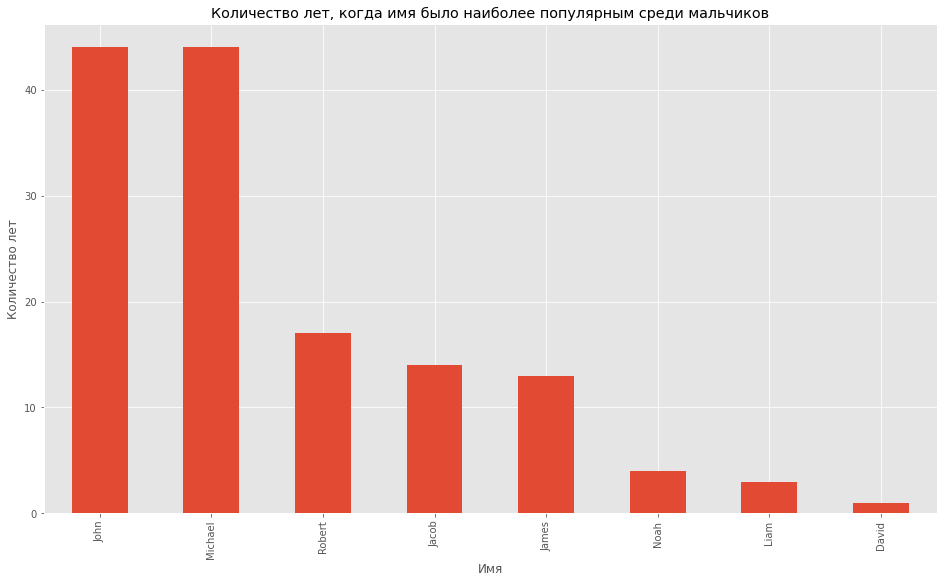

In [47]:
popular_names_for_boys.plot(
    kind='bar',
    title="Количество лет, когда имя было наиболее популярным среди мальчиков",
    xlabel="Имя",
    ylabel="Количество лет"
);

Определить наиболее популярные имена в году среди девочек.

In [48]:
girls = names_data[names_data.sex == 'F']

Получить наиболее популярное имя девочек для каждого года.

In [49]:
girls_by_year = girls.groupby('year').apply(get_most_popular_name)

girls_by_year.tail(10)

year
2010    Isabella
2011      Sophia
2012      Sophia
2013      Sophia
2014        Emma
2015        Emma
2016        Emma
2017        Emma
2018        Emma
2019      Olivia
dtype: object

Получить наиболее популярные имена для девочек за весь период наблюдения.

In [50]:
popular_names_for_girls = girls_by_year.value_counts()

popular_names_for_girls

Mary        76
Jennifer    15
Emily       12
Jessica      9
Lisa         8
Emma         6
Linda        6
Sophia       3
Ashley       2
Isabella     2
Olivia       1
dtype: int64

Построить столбчатую диаграмму для наиболее популярных имен среди девочек.

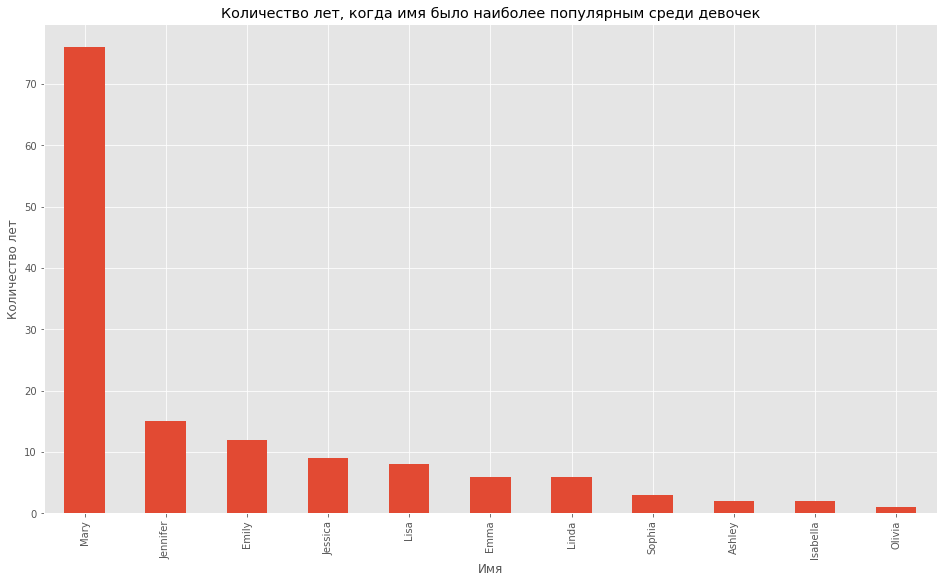

In [51]:
popular_names_for_girls.plot(
    kind='bar',
    title="Количество лет, когда имя было наиболее популярным среди девочек",
    xlabel="Имя",
    ylabel="Количество лет"
);

## Анализ тенденции в выборе имен

Получить сводную таблицу с информацией об именах.

In [52]:
total_births = pd.pivot_table(
    names_data, 
    values='births', 
    index=['year'], 
    columns=['name'], 
    aggfunc=np.sum
)

Отобразить информацию по сводной таблице.

In [53]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Columns: 99444 entries, Aaban to Zzyzx
dtypes: float64(99444)
memory usage: 106.2 MB


Получить информацию для следующих имен: _John_, _Harry_, _Mary_, _Marilyn_.

In [54]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

Отобразить динамику изменения числа новорожденных, названных этими именами.

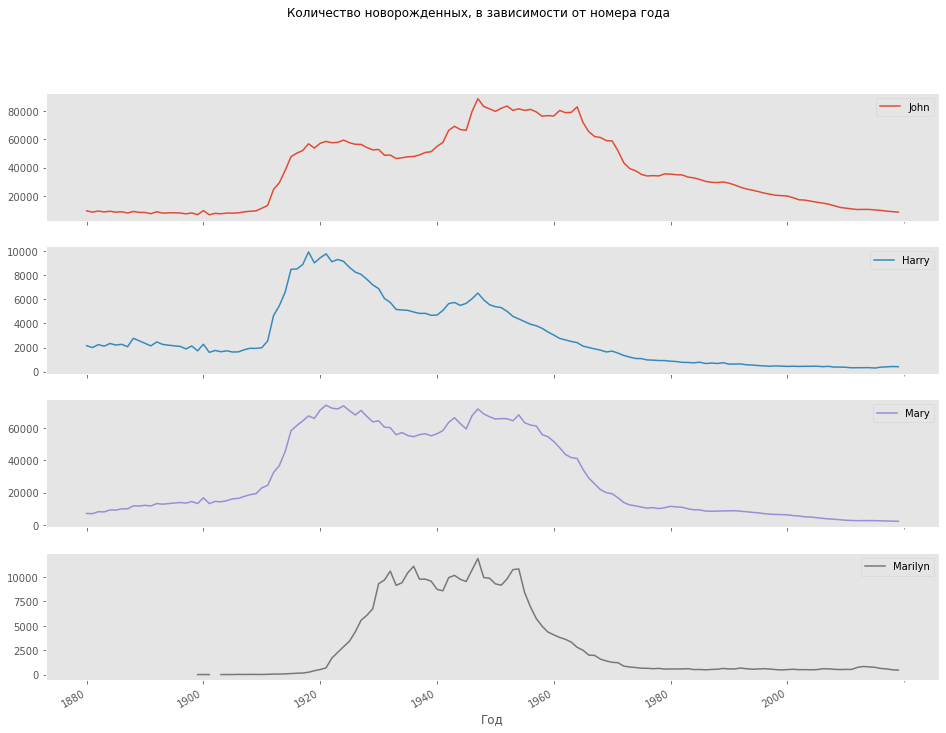

In [55]:
subset.plot(
    subplots=True, 
    figsize=(16, 12), 
    grid=False, 
    xticks=range(years.min(), years.max() + 1, 20),
    title="Количество новорожденных, в зависимости от номера года",
    xlabel="Год"
);

### Задание 5

Для 10 наиболее популярных имен задания 3 отобразите динамику изменения числа новорожденных, названных этими именами. Сделайте выводы.

Выделим информацию для 10 наиболее популярных имен:

In [56]:
subset = total_births[most_popular_names.index]

Отобразить динамику изменения числа новорожденных, названных этими именами.

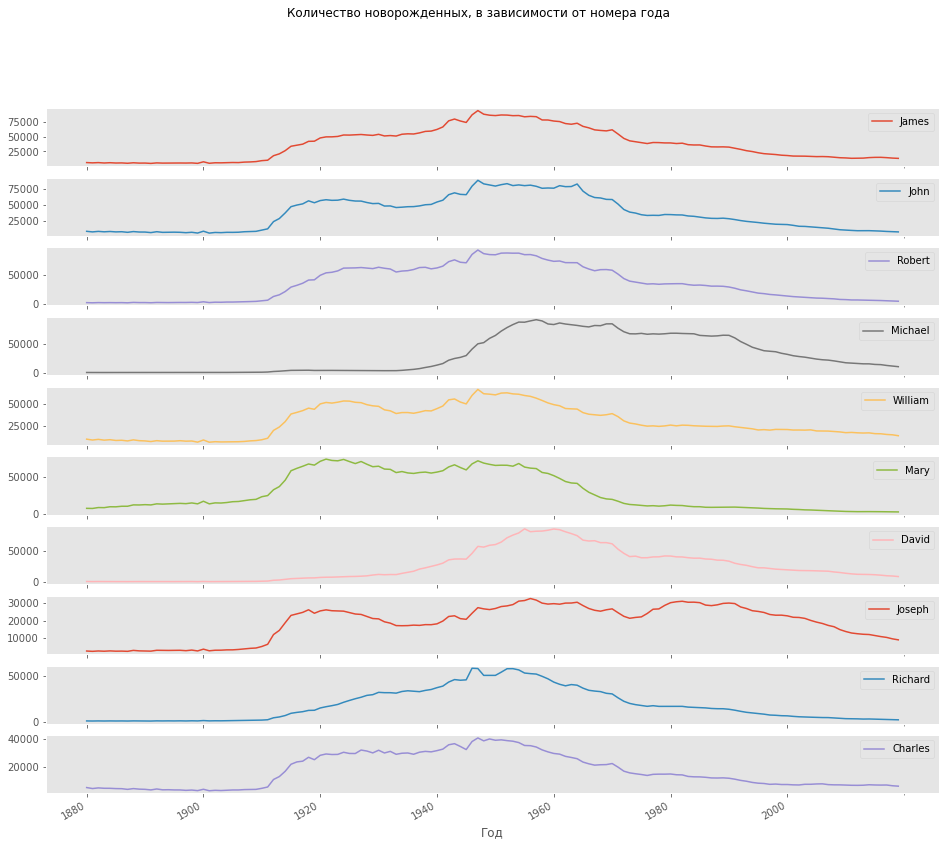

In [57]:
subset.plot(
    subplots=True, 
    figsize=(16, 14), 
    grid=False, 
    xticks=range(years.min(), years.max() + 1, 20),
    title="Количество новорожденных, в зависимости от номера года",
    xlabel="Год"
);

Таким образом, видна тенденция к снижению числа новорожденных, названных наиболее популярными именами. Что еще раз говорит об увеличении в последнии годы разнообразия имен среди младенцев.